In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from larcv import larcv
%matplotlib inline

In [30]:
filename = '/Users/mdeltutt/Downloads/inference_test_3d_n10_r6_mb64_bpl2_nf32_lrstriangle_clr.h5.pkl'
df_3d = pd.read_pickle(filename)

filename = '/Users/mdeltutt/Downloads/inference_test_2d_n1_r6_mb64_bpl2_nf32_lrstriangle_clr.h5.pkl'
df_2d = pd.read_pickle(filename)

In [31]:
df_3d.head()

,pot,nu_pdg,nu_e,nu_vtx_x,nu_vtx_y,nu_vtx_z,n_voxels,true_neutrinoid,pred_neutrinoid,pred_nue,...,lep_thetayz,lep_dep_e,em_dep_e,tot_dep_e,lead_prot_p,lead_prot_costheta,lead_cpi_p,lead_cpi_costheta,lead_npi_p,lead_npi_costheta
0,0.037060,12.0,8.340893,160.139183,-96.574303,190.383341,-9999.0,0.0,0.0,0.997390,...,-2.272058,-9999.0,0.0,3407.206286,1.484414,0.835170,0.037404,0.434756,0.405313,0.793764
1,1.265881,14.0,3.513449,198.261240,-82.345651,80.454648,-9999.0,2.0,2.0,0.006045,...,-9999.000000,-9999.0,0.0,1803.024971,2.669511,0.933394,0.403407,0.520601,-9999.000000,-9999.000000
2,1.265881,-14.0,4.071934,193.362328,-7.598883,363.141290,-9999.0,2.0,2.0,0.005907,...,-9999.000000,-9999.0,0.0,1596.790205,0.601268,0.427700,0.985521,0.804471,-9999.000000,-9999.000000
3,1.265881,14.0,3.963477,151.660744,-91.552009,161.575285,-9999.0,2.0,2.0,0.159561,...,-9999.000000,-9999.0,0.0,1104.882544,0.646172,0.848752,0.570449,0.450572,1.097229,0.847671
4,3.963065,14.0,2.568464,258.919305,94.004678,178.865133,-9999.0,1.0,1.0,0.019049,...,7.752486,-9999.0,0.0,522.509839,1.045217,0.777005,0.073694,-0.359039,-9999.000000,-9999.000000


In [32]:
df_2d.head()

,pot,nu_pdg,nu_e,nu_vtx_x,nu_vtx_y,nu_vtx_z,n_voxels,true_neutrinoid,pred_neutrinoid,pred_nue,...,lep_thetayz,lep_dep_e,em_dep_e,tot_dep_e,lead_prot_p,lead_prot_costheta,lead_cpi_p,lead_cpi_costheta,lead_npi_p,lead_npi_costheta
0,0.037060,12.0,8.340893,160.139183,-96.574303,190.383341,-9999.0,0.0,2.0,0.135617,...,-2.272058,-9999.0,0.0,3407.206286,1.484414,0.835170,0.037404,0.434756,0.405313,0.793764
1,1.265881,14.0,3.513449,198.261240,-82.345651,80.454648,-9999.0,2.0,1.0,0.065916,...,-9999.000000,-9999.0,0.0,1803.024971,2.669511,0.933394,0.403407,0.520601,-9999.000000,-9999.000000
2,1.265881,-14.0,4.071934,193.362328,-7.598883,363.141290,-9999.0,2.0,2.0,0.007433,...,-9999.000000,-9999.0,0.0,1596.790205,0.601268,0.427700,0.985521,0.804471,-9999.000000,-9999.000000
3,1.265881,14.0,3.963477,151.660744,-91.552009,161.575285,-9999.0,2.0,2.0,0.248752,...,-9999.000000,-9999.0,0.0,1104.882544,0.646172,0.848752,0.570449,0.450572,1.097229,0.847671
4,3.963065,14.0,2.568464,258.919305,94.004678,178.865133,-9999.0,1.0,1.0,0.004958,...,7.752486,-9999.0,0.0,522.509839,1.045217,0.777005,0.073694,-0.359039,-9999.000000,-9999.000000


In [33]:
accuracy_3d = np.mean(df_3d['true_neutrinoid'] == df_3d['pred_neutrinoid'])
accuracy_2d = np.mean(df_2d['true_neutrinoid'] == df_2d['pred_neutrinoid'])
print ('NeutrinoID: 3D accuracy:', accuracy_3d, ' - 2D accuracy:', accuracy_2d)

accuracy_3d = np.mean(df_3d['true_prot'] == df_3d['pred_prot'])
accuracy_2d = np.mean(df_2d['true_prot'] == df_2d['pred_prot'])
print ('N protons: 3D accuracy:', accuracy_3d, ' - 2D accuracy:', accuracy_2d)

accuracy_3d = np.mean(df_3d['true_cpi'] == df_3d['pred_cpi'])
accuracy_2d = np.mean(df_2d['true_cpi'] == df_2d['pred_cpi'])
print ('Cpi: 3D accuracy:', accuracy_3d, ' - 2D accuracy:', accuracy_2d)

accuracy_3d = np.mean(df_3d['true_npi'] == df_3d['pred_npi'])
accuracy_2d = np.mean(df_2d['true_npi'] == df_2d['pred_npi'])
print ('Npi: 3D accuracy:', accuracy_3d, ' - 2D accuracy:', accuracy_2d)

NeutrinoID: 3D accuracy: 0.8853105858479576  - 2D accuracy: 0.8535567998196235
N protons: 3D accuracy: 0.8004584570290482  - 2D accuracy: 0.7626169629100747
Cpi: 3D accuracy: 0.8721205516515727  - 2D accuracy: 0.8277404081019127
Npi: 3D accuracy: 0.8914734508286047  - 2D accuracy: 0.8792980346473263


In [34]:
def pot_scale_factor(this_pot, target = 1e20):
    
    return target / this_pot

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# ROC Curve

In [35]:
from sklearn.metrics import roc_curve, auc

def get_rocs(df, name='true_neutrinoid', classes=['nue', 'numu', 'nc']):
    
    fpr = {}
    tpr = {}
    roc_th = {}

    y_true = np.array(df[name])

    for i, this_class in enumerate(classes):    
        y_score = np.array(df['pred_'+this_class])
        fpr[this_class], tpr[this_class], roc_th[this_class] = roc_curve(y_true, y_score, pos_label=i)

    for i,j in fpr.items():
        fpr[i] = 1 - fpr[i]
        
    return fpr, tpr, roc_th

In [48]:
# name='true_neutrinoid'
# classes=['nue', 'numu', 'nc']
# labels=['$\\nu_e$', '$\\nu_\\mu$', '$NC$']

# name='true_prot'
# classes=['prot0', 'prot1', 'prot2']
# labels=['$N_p = 0$', '$N_p = 1$', '$N_p > 1$']

# name='true_cpi'
# classes=['cpino', 'cpiyes']
# labels=['$N_{\\pi^{\\pm}} = 0$', '$N_{\\pi^{\\pm}} > 0$']

name='true_npi'
classes=['npino', 'npiyes']
labels=['$N_{\\pi^{0}} = 0$', '$N_{\\pi^{0}} > 0$']

fpr_3d, tpr_3d, roc_th_3d = get_rocs(df_3d, name, classes)
fpr_2d, tpr_2d, roc_th_2d = get_rocs(df_2d, name, classes)

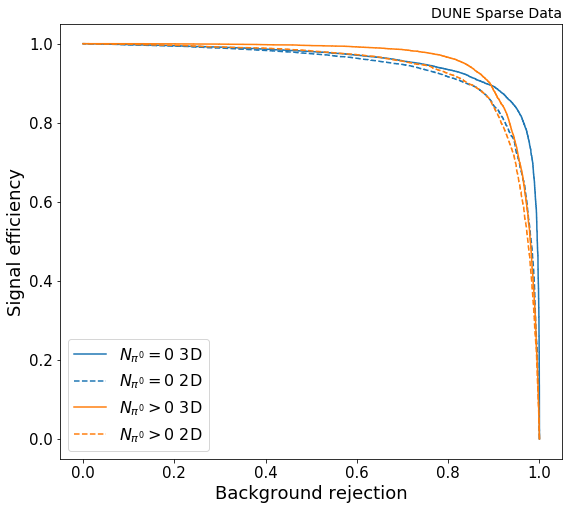

In [49]:
fig = plt.figure(figsize=(9,8),facecolor='w')
plt.figure(1)

# print (fpr_3d['nue'][305])
# print (tpr_3d['nue'][305])
# print (roc_th_3d['nue'][305])

# print (fpr_2d['nue'][305])
# print (tpr_2d['nue'][305])
# print (roc_th_2d['nue'][305])

for i, this_class in enumerate(classes):
    plt.plot(fpr_3d[this_class], tpr_3d[this_class], label=labels[i] +' 3D', color=colors[i])

    plt.plot(fpr_2d[this_class], tpr_2d[this_class], label=labels[i] +' 2D', color=colors[i], linestyle='--')


plt.legend(fontsize=16, loc='best')
plt.ylabel('Signal efficiency',fontsize=18)
plt.xlabel('Background rejection',fontsize=18)
plt.title('DUNE Sparse Data', loc='right', fontsize=14)
plt.tick_params(labelsize=15)

plt.savefig('roc_'+name+'.pdf')
plt.show()

# Confusion Matrix

In [10]:
def get_confusion_matrix_values(df, name='neutrinoid', loop_max=3):
    '''
    Calculates the confusion matrix.
    Returns the bins along x and y (just 0, 1, 2, ...)
    the number of events in each bin (e),
    and the fraction w.r.t. true (recall) (w).
    '''

    x = []
    y = []
    e = []
    w = []

    for sig_t in range(0, loop_max):
        for sig_f in range(0, loop_max):

            true = df.query('true_'+name+' == ' + str(sig_t))
            n = true.query('pred_'+name+' == ' + str(sig_f))
            n = len(n)
        
            x.append(sig_t)
            y.append(sig_f)
            e.append(n)
            w.append(float(n) / len(true))

    return x, y, e, w

def add_text_on_bins_perc(ax, xbins, ybins, hist):
    for i in range(len(ybins)-1):
        for j in range(len(xbins)-1):
            ax.text(xbins[j]+0.5,ybins[i]+0.5, '{0:0.3f}'.format(hist[i,j]), 
                    color="black", ha="center", va="center", fontweight="bold", fontsize=16)
            
def add_text_on_bins(ax, xbins, ybins, hist):
    for i in range(len(ybins)-1):
        for j in range(len(xbins)-1):
            ax.text(xbins[j]+0.5,ybins[i]+0.5, '{0:0.0f}'.format(hist[i,j]), 
                    color="black", ha="center", va="center", fontweight="bold", fontsize=16)
    

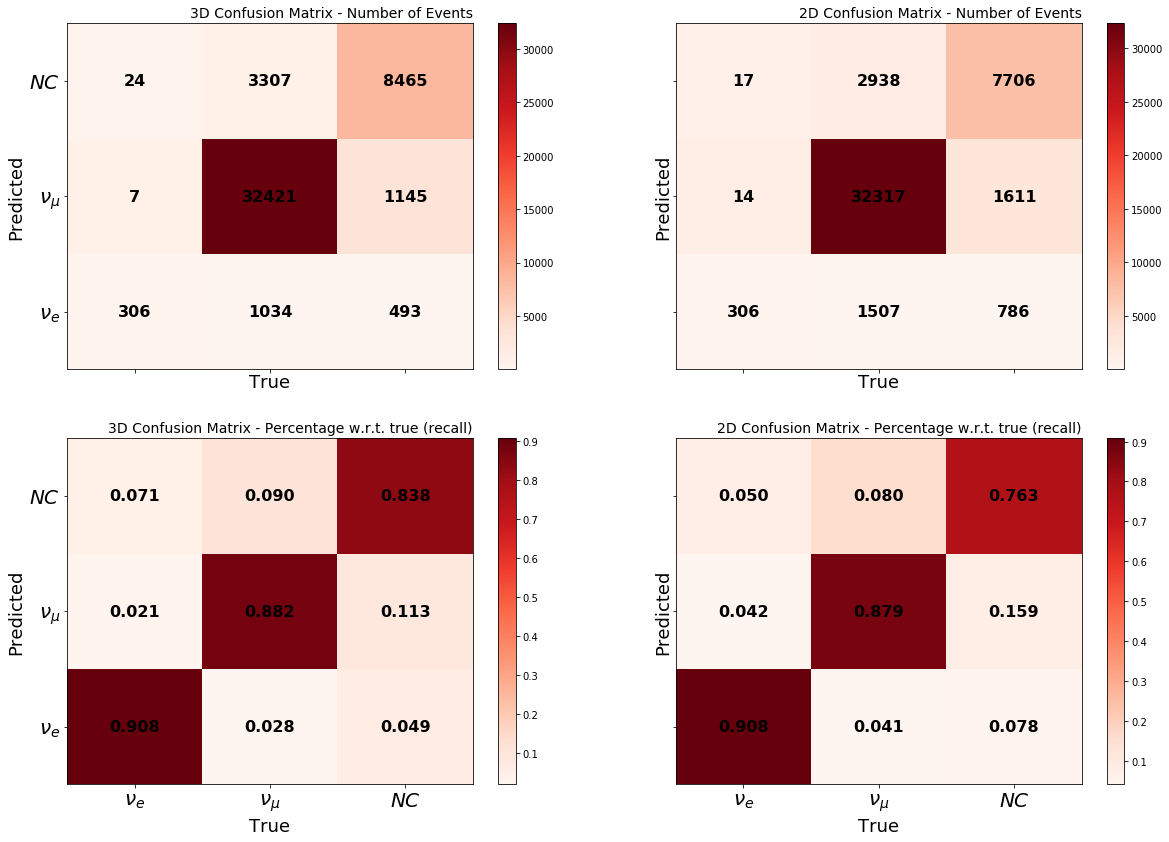

In [11]:
name = 'neutrinoid'
labels = ('$\\nu_e$', '$\\nu_\\mu$', '$NC$')
loop_max = 3

# name = 'prot'
# labels = ('$N_p = 0$', '$N_p = 1$', '$N_p > 1$')
# loop_max = 3

# name = 'cpi'
# labels = ('$N_{\\pi^{\\pm}} = 0$', '$N_{\\pi^{\\pm}} > 0$')
# loop_max = 2

# name = 'npi'
# labels = ('$N_{\\pi^{0}} = 0$', '$N_{\\pi^{0}} > 0$')
# loop_max = 2

x_3d, y_3d, e_3d, w_3d = get_confusion_matrix_values(df_3d, name, loop_max)
x_2d, y_2d, e_2d, w_2d = get_confusion_matrix_values(df_2d, name, loop_max)


fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,14), sharex=True, sharey=True)

hist, xbins, ybins, im = ax[0][0].hist2d(y_3d, x_3d, bins=range(loop_max+1), weights=e_3d, cmap=plt.cm.Reds)
add_text_on_bins(ax[0][0], xbins, ybins, hist)
plt.colorbar(im, ax=ax[0][0])

hist, xbins, ybins, im = ax[0][1].hist2d(y_2d, x_2d, bins=range(loop_max+1), weights=e_2d, cmap=plt.cm.Reds)
add_text_on_bins(ax[0][1], xbins, ybins, hist)  
plt.colorbar(im, ax=ax[0][1])

hist, xbins, ybins, im = ax[1][0].hist2d(y_3d, x_3d, bins=range(loop_max+1), weights=w_3d, cmap=plt.cm.Reds)
add_text_on_bins_perc(ax[1][0], xbins, ybins, hist)
plt.colorbar(im, ax=ax[1][0])

hist, xbins, ybins, im = ax[1][1].hist2d(y_2d, x_2d, bins=range(loop_max+1), weights=w_2d, cmap=plt.cm.Reds)
add_text_on_bins_perc(ax[1][1], xbins, ybins, hist)  
plt.colorbar(im, ax=ax[1][1])

plt.xticks(np.arange(loop_max)+0.5, labels, fontsize=18)
plt.yticks(np.arange(loop_max)+0.5, labels, fontsize=18)

for a in ax:
    for b in a:
        b.tick_params(labelsize=20)
        b.set_xlabel('True',fontsize=18)
        b.set_ylabel('Predicted',fontsize=18)

        b.tick_params(labelsize=20)
        b.set_xlabel('True',fontsize=18)
        b.set_ylabel('Predicted',fontsize=18)

ax[0][0].set_title('3D Confusion Matrix - Number of Events', loc='right', fontsize=14)
ax[0][1].set_title('2D Confusion Matrix - Number of Events', loc='right', fontsize=14)

ax[1][0].set_title('3D Confusion Matrix - Percentage w.r.t. true (recall)', loc='right', fontsize=14)
ax[1][1].set_title('2D Confusion Matrix - Percentage w.r.t. true (recall)', loc='right', fontsize=14)

plt.savefig('confusion_matrix_'+name+'.pdf')
plt.show()